In [2]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


from itertools import combinations


In [3]:
df = pd.read_csv('world_final.csv', index_col=0)

# Pair programming Estadística Inferencial

**Ejercicios estadística inferencial**

1. Igual que en los ejercicios de la clase invertida, evalúa si las siguientes afirmaciones corresponden a una distribución exponencial o poisson.

- ¿El tiempo que transcurre entre la llegada de autobuses a una parada sigue una distribución exponencial o de Poisson?
    - - Exponencial porqué se ve el tiempo entre dos sucesos.

- ¿El número de errores en un artículo de noticias sigue una distribución exponencial o de Poisson?
    - Poisson porque contamos el número de ocurrencias dentro de un artículo.


- ¿El tiempo que transcurre entre la llegada de solicitudes de servicio en un restaurante sigue una distribución exponencial o de Poisson?
    - Exponencial

- ¿El número de accidentes de tráfico en una hora en una ciudad sigue una distribución exponencial o de Poisson?


- ¿El tiempo entre llegadas de llamadas telefónicas a una central de emergencias sigue una distribución exponencial o de Poisson?


- ¿El número de clientes que ingresan a una tienda en una hora sigue una distribución exponencial o de Poisson?


- ¿El tiempo entre llegadas de correos electrónicos en una bandeja de entrada sigue una distribución exponencial o de Poisson?


- ¿El número de defectos en una línea de producción por día sigue una distribución exponencial o de Poisson?


- ¿El tiempo que transcurre entre la llegada de taxis en una parada sigue una distribución exponencial o de Poisson?


- ¿El número de errores de ortografía en un libro de texto sigue una distribución exponencial o de Poisson?

_______
2. Ejercicios intervalo de confianza. Al igual que en el caso del ejercicio de la clase invertida, piensa un motivo por el que sería interesante calcular estos intervalos de confianza para la extracción de insights.

- Intervalo de Confianza para la Esperanza de Vida
Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% para la esperanza de vida promedio de cada continente.

    Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

In [4]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland',
       'capital/majorcity', 'currency-code', 'forestedarea',
       'grossprimaryeducationenrollment', 'largestcity', 'officiallanguage',
       'populationlaborforceparticipation', 'taxrevenue', 'latitude',
       'longitude', 'Continent', 'gasolineprice_i', 'lifeexpectancy_i',
       'landarea_k', 'armedforcessize_k', 'birthrate_k', 'callingcode_k',
       'co2-emissions_k', 'cpi_k', 'cpichange_k', 'fertilityrate_k', 'gdp_k',
       'grosstertiaryeducationenrollment_k', 'infantmortality_k',
       'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k'],
      dtype='object')

In [34]:
# lifeexpectancy_i

continentes =['Europa', 'Africa', 'Asia', 'Oceania', 'America'] 
for continente in continentes:
    esperanza_vida = df.loc[df['Continent']== continente,'lifeexpectancy_i']
    

    media = round(esperanza_vida.mean(),1)
    media 

    # calculamos el error

    error = stats.sem(esperanza_vida)

    nivel_confianza = 0.95

    grados_libertad = len(esperanza_vida)-1


    # calculamos el valor crítico de la muestra
    valor_critico= stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

    # calculamos el intervalo de confianza
    limite_inferior = media - valor_critico * error
    limite_superior = media + valor_critico * error
    print (f"Para el continente {continente} tenemos la siguiente información: ")
    
    print("Intervalo de Confianza :")
    print(f"Media Muestral: {np.round(media, 2)}")
    print(f"Error Estándar: {np.round(error, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza}")
    print(f"Valor Crítico: {np.round(valor_critico, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")

Para el continentte Europa tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 79.2
Error Estándar: 0.56
Nivel de Confianza: 0.95
Valor Crítico: 2.02
Intervalo de Confianza: (78.07, 80.33)
Para el continentte Africa tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 63.7
Error Estándar: 1.43
Nivel de Confianza: 0.95
Valor Crítico: 2.2
Intervalo de Confianza: (60.56, 66.84)
Para el continentte Asia tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 69.4
Error Estándar: 0.75
Nivel de Confianza: 0.95
Valor Crítico: 1.99
Intervalo de Confianza: (67.92, 70.88)
Para el continentte Oceania tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 73.8
Error Estándar: 1.99
Nivel de Confianza: 0.95
Valor Crítico: 2.36
Intervalo de Confianza: (69.09, 78.51)
Para el continentte America tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 74.9
Error Estándar: 0.6
Nivel de Confianza: 0

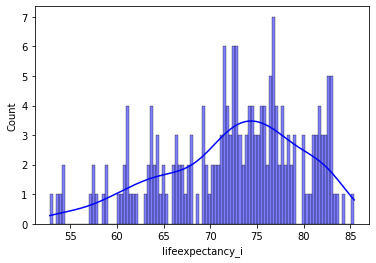

In [35]:
#hacemos un histograma para visualizarlo:

sns.histplot(x = 'lifeexpectancy_i', data = df, color = "blue", kde = True, bins = 100);

- Intervalo de Confianza para el PIB
Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes.

In [37]:

continentes =['Europa', 'Africa', 'Asia', 'Oceania', 'America'] 
for continente in continentes:
    pib = df.loc[df['Continent']== continente,'cpi_k']
    

    media = pib.mean()
    media 

    # calculamos el error

    error = stats.sem(pib)

    nivel_confianza = 0.90

    grados_libertad = len(pib)-1


    # calculamos el valor crítico de la muestra
    valor_critico= stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

    # calculamos el intervalo de confianza
    limite_inferior = media - valor_critico * error
    limite_superior = media + valor_critico * error
    print (f"Para el continente {continente} tenemos la siguiente información: ")
    
    print("Intervalo de Confianza :")
    print(f"Media Muestral: {np.round(media, 2)}")
    print(f"Error Estándar: {np.round(error, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza}")
    print(f"Valor Crítico: {np.round(valor_critico, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")

Para el continentte Europa tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 127.59
Error Estándar: 5.48
Nivel de Confianza: 0.9
Valor Crítico: 1.68
Intervalo de Confianza: (118.37, 136.81)
Para el continentte Africa tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 190.69
Error Estándar: 24.2
Nivel de Confianza: 0.9
Valor Crítico: 1.8
Intervalo de Confianza: (147.23, 234.15)
Para el continentte Asia tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 208.28
Error Estándar: 48.06
Nivel de Confianza: 0.9
Valor Crítico: 1.66
Intervalo de Confianza: (128.46, 288.11)
Para el continentte Oceania tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 129.64
Error Estándar: 8.23
Nivel de Confianza: 0.9
Valor Crítico: 1.89
Intervalo de Confianza: (114.05, 145.23)
Para el continentte America tenemos la siguiente información: 
Intervalo de Confianza :
Media Muestral: 212.67
Error Estándar: 72.51
Nive

- Intervalo de Confianza para la Tasa de Natalidad
Contexto: Trabajas en una agencia gubernamental que se ocupa de cuestiones demográficas y deseas determinar el intervalo de confianza al 99% para la tasa de natalidad promedio en Asia.



In [42]:

natalidad_asia = df.loc[df['Continent']== 'Asia','birthrate_k']
    

media = natalidad_asia.mean()
media 

# calculamos el error

error = stats.sem(natalidad_asia)

nivel_confianza = 0.99

grados_libertad = len(natalidad_asia)-1


# calculamos el valor crítico de la muestra
valor_critico= stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

# calculamos el intervalo de confianza
limite_inferior = media - valor_critico * error
limite_superior = media + valor_critico * error

print("Intervalo de Confianza :")
print(f"Media Muestral: {np.round(media, 2)}")
print(f"Error Estándar: {np.round(error, 2)}")
print(f"Nivel de Confianza: {nivel_confianza}")
print(f"Valor Crítico: {np.round(valor_critico, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")

Intervalo de Confianza :
Media Muestral: 24.74
Error Estándar: 0.98
Nivel de Confianza: 0.99
Valor Crítico: 2.63
Intervalo de Confianza: (22.16, 27.33)


- Intervalo de Confianza para la Tasa de Desempleo
Contexto: Eres un analista de políticas públicas y deseas calcular el intervalo de confianza al 95% para la tasa de desempleo promedio en los países de Oceanía.

In [44]:
#'unemploymentrate_k'


desempleo_oceania = df.loc[df['Continent']== 'Oceania','unemploymentrate_k']
    

media = desempleo_oceania.mean()
media 

# calculamos el error

error = stats.sem(desempleo_oceania)

nivel_confianza = 0.95

grados_libertad = len(desempleo_oceania)-1


# calculamos el valor crítico de la muestra
valor_critico= stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

# calculamos el intervalo de confianza
limite_inferior = media - valor_critico * error
limite_superior = media + valor_critico * error

print("Intervalo de Confianza :")
print(f"Media Muestral: {np.round(media, 2)}")
print(f"Error Estándar: {np.round(error, 2)}")
print(f"Nivel de Confianza: {nivel_confianza}")
print(f"Valor Crítico: {np.round(valor_critico, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")

Intervalo de Confianza :
Media Muestral: 5.92
Error Estándar: 1.3
Nivel de Confianza: 0.95
Valor Crítico: 2.36
Intervalo de Confianza: (2.85, 8.99)



- Intervalo de Confianza para la Tasa de Impuestos
Contexto: Trabajas en un ministerio de finanzas y deseas estimar el intervalo de confianza al 90% para la tasa de impuestos promedio en los países de África.

In [47]:

tasa_impuestos_africa = df.loc[df['Continent']== 'Africa','totaltaxrate_k']
    

media = tasa_impuestos_africa.mean()
media 

# calculamos el error

error = stats.sem(tasa_impuestos_africa)

nivel_confianza = 0.95

grados_libertad = len(tasa_impuestos_africa)-1


# calculamos el valor crítico de la muestra
valor_critico= stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

# calculamos el intervalo de confianza
limite_inferior = media - valor_critico * error
limite_superior = media + valor_critico * error

print("Intervalo de Confianza :")
print(f"Media Muestral: {np.round(media, 2)}")
print(f"Error Estándar: {np.round(error, 2)}")
print(f"Nivel de Confianza: {nivel_confianza}")
print(f"Valor Crítico: {np.round(valor_critico, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")

Intervalo de Confianza :
Media Muestral: 45.67
Error Estándar: 16.07
Nivel de Confianza: 0.95
Valor Crítico: 2.2
Intervalo de Confianza: (10.29, 81.05)


_____
3. Ejercicios prueba de hipótesis: Hasta ahora en la lección y en los ejercicios de la clase invertida os hemos propuesto un contexto y unas hipótesis para entender que es la prueba de hipótesis. 

    Ahora es tu turno, tienes que pensar en 2 hipótesis que quieras aceptar o rechazar usando una prueba de hipótesis en base a los datos que tenemos.

In [48]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland',
       'capital/majorcity', 'currency-code', 'forestedarea',
       'grossprimaryeducationenrollment', 'largestcity', 'officiallanguage',
       'populationlaborforceparticipation', 'taxrevenue', 'latitude',
       'longitude', 'Continent', 'gasolineprice_i', 'lifeexpectancy_i',
       'landarea_k', 'armedforcessize_k', 'birthrate_k', 'callingcode_k',
       'co2-emissions_k', 'cpi_k', 'cpichange_k', 'fertilityrate_k', 'gdp_k',
       'grosstertiaryeducationenrollment_k', 'infantmortality_k',
       'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k'],
      dtype='object')

In [51]:
#sacamos lista de numericas

variables_numericas = df.select_dtypes(include=['float64', 'int64'])
variables_numericas.columns

Index(['density', 'agriculturalland', 'forestedarea',
       'grossprimaryeducationenrollment', 'populationlaborforceparticipation',
       'taxrevenue', 'latitude', 'longitude', 'gasolineprice_i',
       'lifeexpectancy_i', 'landarea_k', 'armedforcessize_k', 'birthrate_k',
       'callingcode_k', 'co2-emissions_k', 'cpi_k', 'cpichange_k',
       'fertilityrate_k', 'gdp_k', 'grosstertiaryeducationenrollment_k',
       'infantmortality_k', 'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k'],
      dtype='object')

In [53]:
variables_categoricas=df.select_dtypes(include='O')
variables_categoricas.columns

Index(['country', 'abbreviation', 'capital/majorcity', 'currency-code',
       'largestcity', 'officiallanguage', 'Continent'],
      dtype='object')

In [ ]:
# Queremos saber si la población urbana dufiere en función de si el continente es desarrollado o no. Por ejemplo, comparamos Europa con Africa. 

# Nuestra hipótesis nula es que no hay diferencias.
# Hipotesis alternativa: si hay diferencias


In [54]:

def prueba_hipotesis(*args):
    
    # lo primero que tenemos que hacer es mirar si las varianzas son iguales o no
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1]
    else:
        p_valor_varianza = stats.bartlett(*args)[1]
    
    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05

    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa en los ingresos promedio entre los dos grupos.")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.")

In [60]:
#'urban_population_k'
# filtramos los datos para obtener dos grupos: 
pais_en_vias_de_desarrollo = df[df['Continent'] == 'Africa']['urban_population_k']
pais_desarrollado = df[df['Continent'] == 'Europa']['urban_population_k']

# llamamos a la función que hemos creado
prueba_hipotesis(pais_en_vias_de_desarrollo, pais_desarrollado)


No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.


In [61]:
#'urban_population_k'
# filtramos los datos para obtener dos grupos: 
pais_en_vias_de_desarrollo = df[df['Continent'] == 'Africa']['lifeexpectancy_i']
pais_desarrollado = df[df['Continent'] == 'Europa']['lifeexpectancy_i']

# llamamos a la función que hemos creado
prueba_hipotesis(pais_en_vias_de_desarrollo, pais_desarrollado)


Rechazamos la hipótesis nula.
Hay una diferencia significativa en los ingresos promedio entre los dos grupos.
